#  Analysis of OnlySolution's Customer Acquisition Activities in 2020
This is an analysis targeted to identify significant trends and find potential areas for optimization.

## Import all needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Read the data
df = pd.read_csv('data/law-keyword.csv')

# Remove any columns that start with 'Unnamed'
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Remove columns where Clicks < Conversions
df = df.loc[df['Clicks'] >= df['Conversions']]

# Save formatted data
df.to_csv('data/category-campaign.csv')

# Group the data by keywords
df = df.groupby('Keyword').sum()

## Add columns with CTR, CR, Margin, ROAS, CPC, CPA

In [3]:
# Add CTR (Click through Rate) = Clicks / Impressions
df['CTR'] = df['Clicks'] / df['Impressions']

# Add CR (Conversion Rate) = Conversions / Clicks
df['CR'] = df['Conversions'] / df['Clicks']

# Add Margin = Revenue - Cost
df['Margin'] = df['Revenue'] - df['Cost']

# Add ROAS (Return on Ad Spend) = Revenue / Cost
df['ROAS'] = df['Revenue'] / df['Cost']

# Add CPC (Cost per Click) = Cost / Clicks
df['CPC'] = df['Cost'] / df['Clicks']

# Add CPA (Cost per Acquisition) = Cost / Conversions
df['CPA'] = df['Cost'] / df['Conversions']

## Analyze the worst performing keywords

In [4]:
# Show top 15 keywords with the lowest Margin value
df.sort_values('Margin').head(15)[['Margin']]

,Margin
Keyword,
free legal advice,-2506.02
talk to a lawyer for free online now,-533.01
contact a lawyer for free consultation,-479.40
chat online with a lawyer for free now,-431.44
free attorneys,-422.21
+free +legal +lawyer +advice,-397.06
free lawyer advice,-354.19
attorney free,-320.25
free attorney,-286.83


As we can see, all these searches contain 'free'. Let's see whether there are searches that contain 'free' that bring positive revenue.

In [5]:
num_positive = df.loc[df.index.str.contains('free') & (df['Margin'] >= 0)].shape[0]
avg_loss = df.loc[df.index.str.contains('free')]['Margin'].mean()

print(f'Number of searches that contain \'free\' and are profitable: {num_positive}.')
print(f'Average loss from searches that contain \'free\': {avg_loss}.')

Number of searches that contain 'free' and are profitable: 0.
Average loss from searches that contain 'free': -281.01607142857154.


We should definitely remove our ads from searches that contain 'free' as they have never been profitable, according to the data.

In [6]:
# Find all keywords that did not bring any money, sorted by the number of Impressions
df.loc[df['Revenue'] == 0].sort_values('Impressions', ascending=False)[['Impressions', 'Margin']]

,Impressions,Margin
Keyword,,
you tupe,106368,-34.60
tupe you,93818,-33.13
criminal defense lawyer free consultation,63479,-28.18
real,58075,-10.07
remove,34898,-57.20
los angeles criminal lawyer,15416,-3.98
philadelphia +pa lawyers,14954,-4.31
+pa law for,14310,-10.68
with legal aid,8247,-9.48


Obviously, searches that have never brought us any revenue should also be removed. Luckily, there are only 15 of them and we haven't lost that much money on them yet.

## Analyze request lengths

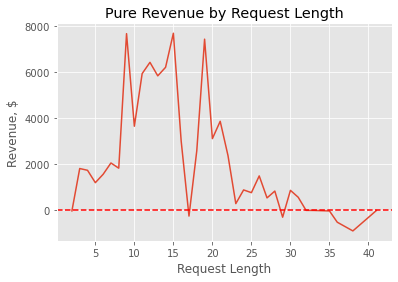

In [7]:
# Add 'Request Length' column
df['Request Length'] = df.index.str.len()

plt.style.use('ggplot')

# Plot pure revenue by request length
df.groupby('Request Length').sum()['Margin'].plot()
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Pure Revenue by Request Length')
plt.ylabel("Revenue, $")

plt.show()

There is an abrupt decline in revenue between 15 and 20 request lengths (graph 1). It is mainly caused by words with ‘free’ in them that we have already decided to throw away.

In [8]:
# Calculate loss size for requests with length over 35
df.loc[df['Request Length'] >= 35]['Margin'].sum()

-1515.4400000000012

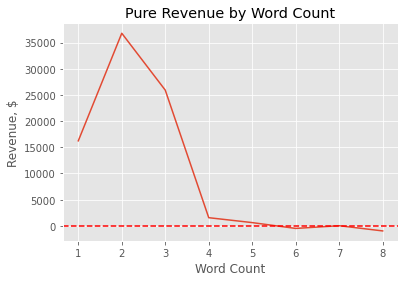

In [9]:
# Add 'Word Count' column
df['Word Count'] = df.index.str.count(' ') + 1

# Plot pure revenue by word count
df.groupby('Word Count').sum()['Margin'].plot()
plt.axhline(y=0, color='r', linestyle='--')

plt.style.use('ggplot')
plt.title('Pure Revenue by Word Count')
plt.ylabel("Revenue, $")

plt.show()

In [10]:
# Calculate loss size for requests with word count over 5
df.loc[df['Word Count'] >= 6]['Margin'].sum()

-1425.4100000000012

Requests with more than 4 words are usually too specific and tend to be unprofitable for the company. Removing them completely will reduce yearly losses by more than $1500. The company should focus more on short and simple requests as they are usually the ones bringing the largest sums of money.